<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/7/78/Eindhoven_University_of_Technology_logo_new.png?20231008195526" alt="TU/e Logo" width="200px"/>
</p>

# Assignment 1: Evolutionary Process Discovery

**Course:** 1BM120 – Decision Making with Artificial Intelligence  
**Date:** *Q4 - 2025*  

---

## Group 3

- **Sadra Moosavi Lar**  
  ✉️ [s.s.moosavi.lar@student.tue.nl](mailto:s.s.moosavi.lar@student.tue.nl)

- **Floris van Hasselt**  
  ✉️ [f.j.p.v.hasselt@student.tue.nl](mailto:f.j.p.v.hasselt@student.tue.nl)

- **Sam Fiers**  
  ✉️ [s.s.w.fiers@student.tue.nl](mailto:s.s.w.fiers@student.tue.nl)

---

**Repository:** [GitHub – Group 3 Repo](https://github.com/sadra-hub/1BM120-decisiondecisionMakingWithAI)

---

## Description

This assignment focuses on discovering a **Petri Net (PN) matrix** from logged activity traces recorded by a company. The data is provided in `dataset_a1.txt`, and the objective is to extract a meaningful process model using **evolutionary algorithms** and evaluate its performance based on alignment and fitness.

## Exercise 1

We perform exercise 1 using [‘cxTwoPoint’, ‘mutFlipBit’, ‘selTournament’] as the [Crossover, Mutation, Selection] and the eaSimple algorithm as the following:

- *POP_SIZE* = 100
- *N_GEN* = 80

### Best solution: [7, 5, 7, 8, 0, 2, 2, 3, 3, 7, 0, 4, 5, 7, 3, 6, 1, 3, 7, 8, 5, 8, 7, 8]
### Best fitness: 0.7604725552225553

And the plot shows the convergence to the optimum solution:
 
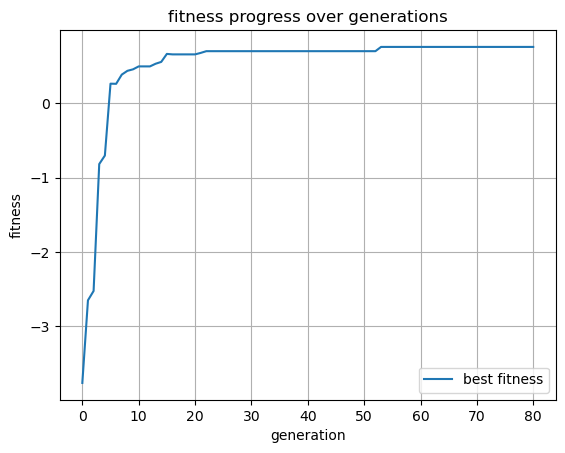

## Exercise 2

In part 2 we've extended the previous exercise by changing the setting and run the algorithm with each setting 10 times which gives the following table: 

### config results over 10 runs

| Crossover     | Mutation             | Selection     | ABF   | Time (Seconds) |
|---------------|----------------------|----------------|--------|----------------|
| cxTwoPoint    | mutFlipBit           | selTournament  | 0.569  | 125.84         |
| cxTwoPoint    | mutFlipBit           | selRoulette    | 0.380  | 105.22         |
| cxTwoPoint    | mutShuffleIndexes    | selTournament  | 0.653  | 112.88         |
| cxTwoPoint    | mutShuffleIndexes    | selRoulette    | 0.395  | 97.27          |
| cxOrdered     | mutFlipBit           | selTournament  | 0.451  | 93.66          |
| cxOrdered     | mutFlipBit           | selRoulette    | 0.314  | 122.25         |
| cxOrdered     | mutShuffleIndexes    | selTournament  | 0.670  | 475.11         |
| cxOrdered     | mutShuffleIndexes    | selRoulette    | 0.255  | 71.29          |

From the results, it can be seen that the 2P-SI-Tour GA variant is the most successful by achieving the best ABF score. 2P-SI-Tour stands for csTwoPoint mutShuffleIndexes selTournament. From the results, it can be seen that the Seltournament variants take the most time. This can be explained by the fact that the tournaments require more operations than the simple roulette operations. Another big difference that’s visible across the runs is that the cxTwoPoint Cross over variants perform significantly better than the cxOrdered variants


### plots
<table>
  <tr>
    <td style="text-align: center;">
      <img src="images/exercise2a.png" width="400"/><br/>
      <b>Average Best Fitness over generations for each run</b>
    </td>
    <td style="text-align: center;">
      <img src="images/exercise2b.png" width="400"/><br/>
      <b>Average Best Fitness over each run </b>
    </td>
  </tr>
</table>

## Exercise 3 

In part 3 we explore different probabilities for mutation and crossover which the results can be shown below

| Mutation Prob \ Crossover Prob | 0.2       | 0.4       | 0.6       | 0.8       |
|-------------------|-----------|-----------|-----------|-----------|
| 0.2               | 0.4267    | 0.5100    | 0.5640    | 0.5460    |
| 0.4               | 0.4890    | 0.4930    | 0.5460    | 0.5648    |
| 0.6               | 0.4470    | 0.4700    | 0.5040    | 0.4780    |
| 0.8               | 0.2160    | 0.3590    | 0.4190    | 0.3830    |

In order to find the best combo, we also measure the time it takes for getting the fitness and sorted the results based on fitness value AND time which gave us the following:
✅ Best combo: CX=0.8, MUT=0.4 with mean Best Fitness = 0.5648

## Exercise 4

Here we made this 

```
def repair_candidate(matrix):
    repaired = matrix.copy()

    # using step size of 2 to iterate over [src, tgt] pairs
    for i in range(0, len(repaired), 2):
        src = repaired[i]
        tgt = repaired[i + 1]

        # Fix self-loops
        while src == tgt:
            tgt = np.random.randint(0, MAX_VAL + 1) # using MAX_VAL + 1 to include MAX_VAL

        # Fix backwards visible transitions (only for visible transitions: i >= 4)
        # i = 0 → t0, i = 2 → t1, i = 4 → t2 (visible starts at transition index 2)
        if i >= 4 and src > tgt:
            tgt = np.random.randint(src, MAX_VAL + 1)

        # Write back into flat array
        repaired[i] = src
        repaired[i + 1] = tgt

    return repaired
```

Which basically fix the self loops by generating a new target and also fix the backward for visibile transitions by generating a new target larger than source. 
Note that i is stepping 2 times not 1, this is to jump to the next pair for each iteration of for loop



## Exercise 5

Here we used and best params (cxTwoPoint, mutShuffleIndexes and selTournament) and best probs (CX=0.8, MUT=0.4) one before and one after using the decorator and this was the result.

## Comment for PETRINAS:
Dear PETRINAS, we've tried to use the activity log your provided to us to find a connection between activities that can be viewed in the pictures below. We've applied two of your business logics (no self loops and no backward for visibile transitions) and the best probabilities and paramaters to get these results: 

This is not the best solution, there could be a better solution with higher fitnesss but based on what we've found after more than 10 hours of processing, this is the best process for your business. 

## graphviz

<table>
  <tr>
    <td style="text-align: center;">
      <img src="images/best_before.png" width="400"/><br/>
      <b>Before Repair</b>
    </td>
    <td style="text-align: center;">
      <img src="images/best_after.png" width="400"/><br/>
      <b>After Repair</b>
    </td>
  </tr>
</table>